# Analise de dados das rodadas do Brasileirão de 2000 a 2020

# Grupo

# Kevin Castro de Oliveira   RA: 418110492

# Fabio Lettieri                      RA: 418105539

# Henrique Pereira                RA: 418104607

In [2]:
#imports
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import datasets

In [4]:
#abrir um csv do brasileirao
brasileirao_df = pd.read_csv("campeonato-brasileiro-full.csv")

#mostra apenas a primeira rodada do primeiro campeonato dos dados que seria em 2000
brasileirao_df.head(9)

,ID,Rodada,Data,Horário,Dia,Mandante,Visitante,Vencedor,Arena,Mandante Placar,Visitante Placar,Estado Mandante,Estado Visitante,Estado Vencedor
0,1,1,2000-07-29,16h00,Sábado,Fluminense,Bahia,Fluminense,Maracanã,2,0,RJ,BA,RJ
1,2,1,2000-07-29,16h00,Sábado,Vasco,Sport,Sport,São Januário,0,2,RJ,PE,PE
2,3,1,2000-07-29,16h00,Sábado,Vitória,Palmeiras,Vitória,Barradão,4,1,ES,SP,ES
3,4,1,2000-07-30,17h00,Domingo,Botafogo-RJ,Atlético-MG,-,Caio Martins,0,0,RJ,MG,-
4,5,1,2000-07-30,18h30,Domingo,Juventude,Flamengo,-,Alfredo Jaconi,1,1,RS,RJ,-
5,6,1,2000-07-30,16h00,Domingo,Guarani,Santa Cruz,-,Brinco de Ouro,0,0,SP,PE,-
6,7,1,2000-07-30,17h00,Domingo,Cruzeiro,Athlético-PR,Athlético-PR,Mineirão,0,2,MG,PR,PR
7,8,1,2000-07-30,16h00,Domingo,América-MG,Gama,Gama,Independência,0,1,MG,DF,DF
8,9,1,2000-07-30,18h30,Domingo,Goiás,Corinthians,Goiás,Serra Dourada,3,0,GO,SP,GO


In [5]:
#resumo de informações sobre os campos do dataframe do Brasileirão
brasileirao_df.info()

#podemos ver que todos os dados estão preenchidos nas linhas exeto o da tabela de horarios que existem 357 sem esta preenchido



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8319 entries, 0 to 8318
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                8319 non-null   int64 
 1   Rodada            8319 non-null   object
 2   Data              8319 non-null   object
 3   Horário           7962 non-null   object
 4   Dia               8319 non-null   object
 5   Mandante          8319 non-null   object
 6   Visitante         8319 non-null   object
 7   Vencedor          8319 non-null   object
 8   Arena             8319 non-null   object
 9   Mandante Placar   8319 non-null   int64 
 10  Visitante Placar  8319 non-null   int64 
 11  Estado Mandante   8319 non-null   object
 12  Estado Visitante  8319 non-null   object
 13  Estado Vencedor   8319 non-null   object
dtypes: int64(3), object(11)
memory usage: 910.0+ KB


In [6]:

#resumo de informações estatisticas importantes referente aos ultimos 20 anos de campeonato Brasileiro
brasileirao_df.describe()

#podemos ver com o comando describre algumas estatisticas do Brasileirão nos ultimos 20 anos

#média de gols de Mandantes = 1.58
#média de gols de Visitantes = 1.05

#minimo de gols de um Mandante = 0
#minimo de gols de um Visitante = 0 

#maximo de gols de um Mandante = 7
#maximo  de gols de um Visitante = 7 

,ID,Mandante Placar,Visitante Placar
count,8319.000000,8319.000000,8319.000000
mean,4160.000000,1.588292,1.053492
std,2401.632778,1.245473,1.040604
min,1.000000,0.000000,0.000000
25%,2080.500000,1.000000,0.000000
50%,4160.000000,1.000000,1.000000
75%,6239.500000,2.000000,2.000000
max,8319.000000,7.000000,7.000000


In [7]:

#verificando os dados das rodadas 1 que tiveram vencedores(ou seja o que for diferente de "-" que seria um empate
vencedor_primeira_rodada = brasileirao_df[(brasileirao_df["Rodada"] == '1' ) & (brasileirao_df["Vencedor"] !=  '-')]

#passando apenas os campos desejados para a tabela que são o campo de Rodada, Vencedor da rodada e onde o jogo foi disputado e sua data
vencedor_rodada = vencedor_primeira_rodada[["Rodada", "Vencedor", "Arena", "Data"]]

vencedor_rodada

#podemos verificar todos os times que ganharam na primeira rodada do Brasileiro nos ultimos 20 anos, o vencedor, onde a partida 
#foi realizada e a data da mesma

,Rodada,Vencedor,Arena,Data
0,1,Fluminense,Maracanã,2000-07-29
1,1,Sport,São Januário,2000-07-29
2,1,Vitória,Barradão,2000-07-29
6,1,Athlético-PR,Mineirão,2000-07-30
7,1,Gama,Independência,2000-07-30
...,...,...,...,...
7941,1,Sport,Ilha do Retiro,2020-08-08
7942,1,Atlético-MG,Maracanã,2020-08-09
7944,1,Grêmio,Arena do Grêmio,2020-08-09
7945,1,Bahia,Nilton Santos (Engenhão),2020-09-30


In [8]:
#podemos verificar a quantidade de partida realizadas no Brasileirão nos ultimos 20 anos
NumeroPartidas = brasileirao_df.shape

print("Numero de partidas disputadas no Brasileirão nos ultimos 20 anos :", NumeroPartidas[0])

Numero de partidas disputadas no Brasileirão nos ultimos 20 anos : 8319


In [9]:
#relação de partidas disputadas no estado de SP nos ultimos 20 anos
partidas_sp = brasileirao_df[brasileirao_df["Estado Mandante"] == 'SP']

partidas_sp


,ID,Rodada,Data,Horário,Dia,Mandante,Visitante,Vencedor,Arena,Mandante Placar,Visitante Placar,Estado Mandante,Estado Visitante,Estado Vencedor
5,6,1,2000-07-30,16h00,Domingo,Guarani,Santa Cruz,-,Brinco de Ouro,0,0,SP,PE,-
14,15,2,2000-08-02,20h30,Quarta-feira,Ponte Preta,América-MG,Ponte Preta,Moisés Lucarelli,3,1,SP,MG,SP
15,16,2,2000-08-02,20h30,Quarta-feira,Santos,Vitória,Santos,Vila Belmiro,2,0,SP,ES,SP
16,17,2,2000-08-03,20h30,Quinta-feira,Palmeiras,Botafogo-RJ,-,Pq. Antarctica,0,0,SP,RJ,-
18,19,3,2000-08-05,18h00,Sábado,Corinthians,Gama,Corinthians,Canindé,4,2,SP,DF,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8302,8303,37,2021-02-21,16:00,Domingo,Corinthians,Vasco,-,Neo Química Arena,0,0,SP,RJ,-
8304,8305,37,2021-02-21,18:15,Domingo,Santos,Fluminense,-,Vila Belmiro,1,1,SP,RJ,-
8307,8308,37,2021-02-22,18:00,Segunda-Feira,Palmeiras,Atlético-GO,-,Allianz Parque,1,1,SP,GO,-
8311,8312,38,2021-02-25,21:30,Quinta-Feira,São Paulo,Flamengo,São Paulo,Morumbi,2,1,SP,RJ,SP


In [10]:
#podemos verificar todos os jogos que aconteceram no estado de SP que foram vencidos por clubes Paulistas no ultimos 20 anos
partidas_sp_vencidos_mandates = brasileirao_df[(brasileirao_df["Estado Mandante"] == 'SP') & (brasileirao_df["Estado Vencedor"] == 'SP')]

partidas_sp_vencidos_mandates[["Rodada", "Mandante", "Vencedor","Arena","Mandante Placar","Visitante Placar", "Data","Horário"]]



,Rodada,Mandante,Vencedor,Arena,Mandante Placar,Visitante Placar,Data,Horário
14,2,Ponte Preta,Ponte Preta,Moisés Lucarelli,3,1,2000-08-02,20h30
15,2,Santos,Santos,Vila Belmiro,2,0,2000-08-02,20h30
18,3,Corinthians,Corinthians,Canindé,4,2,2000-08-05,18h00
26,3,São Paulo,São Paulo,Morumbi,2,1,2000-08-06,17h00
40,6,São Paulo,São Paulo,Morumbi,3,2,2000-08-12,18h00
...,...,...,...,...,...,...,...,...
8271,34,Corinthians,Corinthians,Neo Química Arena,2,1,2021-02-03,21:30
8290,36,Santos,Santos,Vila Belmiro,2,0,2021-02-13,19:00
8294,36,Palmeiras,Palmeiras,Allianz Parque,3,0,2021-02-14,18:15
8311,38,São Paulo,São Paulo,Morumbi,2,1,2021-02-25,21:30


In [11]:
#podemos verificar os jogos entre times paulistas e cariocas nos ultimos 20 anos
partidas_sp_x_rj = brasileirao_df[((brasileirao_df["Estado Mandante"] == 'SP') & (brasileirao_df["Estado Visitante"] == 'RJ')) | ((brasileirao_df["Estado Mandante"] == 'RJ') & (brasileirao_df["Estado Visitante"] == 'SP'))]

#numero de partidas disputadas por paulistas e cariocas no ultimos 20 anos
print("Numero de partidas disputadas entre times cariocas e paulistas nos ultimos 20 anos: ", partidas_sp_x_rj.shape[0])

#numero de partidas vencidas por paulistas nos ultimos 20 anos
vitorias_paulistas = partidas_sp_x_rj[partidas_sp_x_rj["Estado Vencedor"] == 'SP']
#numero de partidas vencidas por cariocas nos ultimos 20 anos
vitorias_Cariocas = partidas_sp_x_rj[partidas_sp_x_rj["Estado Vencedor"] == 'RJ']
#numero de empates no ultimos 20 anos
empates = partidas_sp_x_rj[partidas_sp_x_rj["Estado Vencedor"] == '-']

print("Numero de vitorias de times paulista sobre times cariocas nos ultimos 20 anos : ", vitorias_paulistas.shape[0])
print("Numero de vitorias de times cariocas sobre times paulista nos ultimos 20 anos : ", vitorias_Cariocas.shape[0])
print("Numero empates entre times paulistas e cariocas nos ultimos 20 anos : ", empates.shape[0])

partidas_sp_x_rj[["Rodada", "Mandante", "Visitante", "Vencedor","Arena","Mandante Placar","Visitante Placar", "Data","Horário"]]



Numero de partidas disputadas entre times cariocas e paulistas nos ultimos 20 anos:  788
Numero de vitorias de times paulista sobre times cariocas nos ultimos 20 anos :  299
Numero de vitorias de times cariocas sobre times paulista nos ultimos 20 anos :  262
Numero empates entre times paulistas e cariocas nos ultimos 20 anos :  227


,Rodada,Mandante,Visitante,Vencedor,Arena,Mandante Placar,Visitante Placar,Data,Horário
16,2,Palmeiras,Botafogo-RJ,-,Pq. Antarctica,0,0,2000-08-03,20h30
19,3,Fluminense,Santos,Fluminense,Maracanã,2,1,2000-08-05,16h00
29,4,Flamengo,Guarani,-,Maracanã,1,1,2000-08-09,20h30
32,4,Botafogo-RJ,Portuguesa,Botafogo-RJ,Caio Martins,4,1,2000-08-09,20h30
37,5,Vasco,Corinthians,Vasco,São Januário,1,0,2000-08-11,20h30
...,...,...,...,...,...,...,...,...,...
8292,36,Flamengo,Corinthians,Flamengo,Maracanã,2,1,2021-02-14,16:00
8302,37,Corinthians,Vasco,-,Neo Química Arena,0,0,2021-02-21,16:00
8304,37,Santos,Fluminense,-,Vila Belmiro,1,1,2021-02-21,18:15
8308,37,Botafogo-RJ,São Paulo,Botafogo-RJ,Nilton Santos (Engenhão),1,0,2021-02-22,20:00


In [12]:
#podemos ver o numero de vitorias dos clubes paulistas no ultimos 20 anos
vitorias_Santos = brasileirao_df[brasileirao_df["Vencedor"] == 'Santos']
vitorias_SaoPaulo = brasileirao_df[brasileirao_df["Vencedor"] == 'São Paulo']
vitorias_Corinthians = brasileirao_df[brasileirao_df["Vencedor"] == 'Corinthians']
vitorias_Palmeiras = brasileirao_df[brasileirao_df["Vencedor"] == 'Palmeiras']

print("Numero de vitorias Santos : ", vitorias_Santos.shape[0])
print("Numero de vitorias Sao Paulo : ", vitorias_SaoPaulo.shape[0])
print("Numero de vitorias Corinthians : ", vitorias_Corinthians.shape[0])
print("Numero de vitorias Palmeiras : ", vitorias_Palmeiras.shape[0])

Numero de vitorias Santos :  333
Numero de vitorias Sao Paulo :  366
Numero de vitorias Corinthians :  306
Numero de vitorias Palmeiras :  294


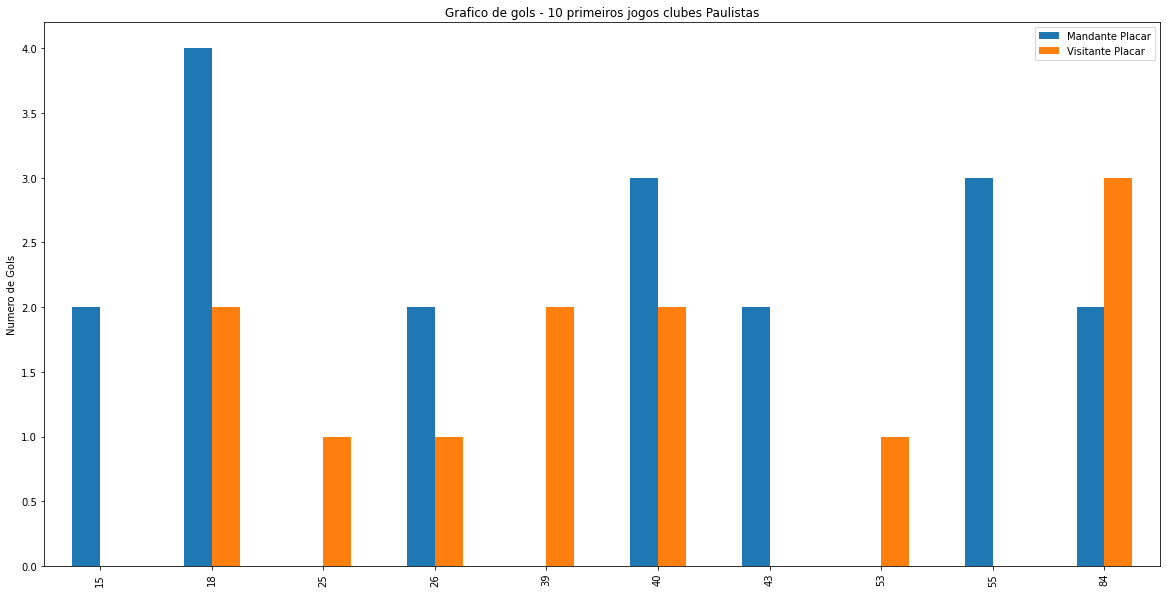

In [13]:
#podemos verificar as vitorias de clubes paulistas no ultimos 20 anos
vitorias_Paulistas = brasileirao_df[(brasileirao_df["Vencedor"] == 'Santos') | (brasileirao_df["Vencedor"] == 'São Paulo') | (brasileirao_df["Vencedor"] == 'Corinthians') | (brasileirao_df["Vencedor"] == 'Palmeiras')]

#e separar os gols dos mesmos, tanto como mandate quanto por visitantes
golsMandatesVisitantes = vitorias_Paulistas[["Mandante Placar","Visitante Placar"]]

#analisando os gols do primeiros 10 jogos (do clube e seu adversario)
dezPrimeirosJogos = golsMandatesVisitantes.head(10)

#geralndo um grafico para mostrar os gols feitos por clubes paulistas nas suas primeiras 10 vitorias, como visitantes e mandantes
dezPrimeirosJogos.plot(kind = 'bar', figsize =(20,10))
plt.title('Grafico de gols - 10 primeiros jogos clubes Paulistas')
plt.xlabel('')
plt.ylabel('Numero de Gols')
plt.show()


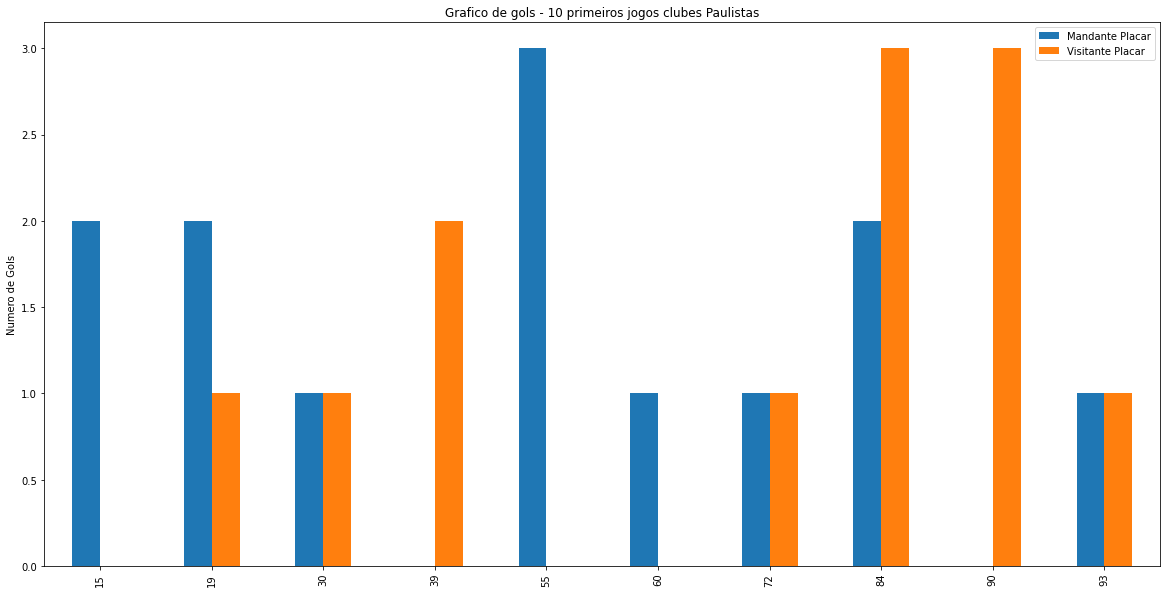

In [14]:
#podemos verificar os jogos do santos no ultimos 20 anos
jogos_santos = brasileirao_df[(brasileirao_df["Mandante"] == 'Santos') | (brasileirao_df["Visitante"] == 'Santos')]

#trazer apenas os gols, feitos como mandate e visitante
gols_pro_contra = jogos_santos[["Mandante Placar","Visitante Placar"]]

#e verificar no grafico nos primeiros 10 jogos os gols tanto do mandate quanto do visitante (que seria do santos e seus adiversarios)
dezPrimeirosJogos = gols_pro_contra.head(10)

#grafico
dezPrimeirosJogos.plot(kind = 'bar', figsize =(20,10))
plt.title('Grafico de gols - 10 primeiros jogos clubes Paulistas')
plt.xlabel('')
plt.ylabel('Numero de Gols')
plt.show()

<AxesSubplot:xlabel='Visitante Placar', ylabel='Mandante Placar'>

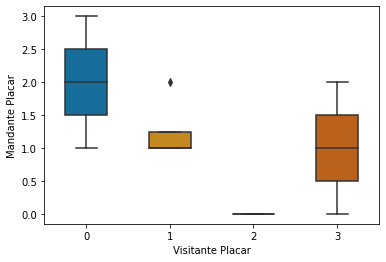

In [15]:

#podemos verificar os jogos do santos no ultimos 20 anos
jogos_santos = brasileirao_df[(brasileirao_df["Mandante"] == 'Santos') | (brasileirao_df["Visitante"] == 'Santos')]

#trazer apenas os gols, feitos como mandate e visitante
gols_pro_contra = jogos_santos[["Mandante Placar", "Visitante Placar"]]

#e verificar no grafico nos primeiros 10 jogos os gols tanto do mandate quanto do visitante (que seria do santos e seus adiversarios)
dezPrimeirosJogos = gols_pro_contra.head(10)

#grafico com medias
sns.boxplot(y='Mandante Placar', x='Visitante Placar',
data = dezPrimeirosJogos,
width = 0.5,
palette = "colorblind")

In [16]:
#Estou puxando a base de iris que vem no sklearn para realizar a manipulação, pois não consegui entender completamente 
#como funciona, não consegui implementar a base de dados das rodadas do campeonato brasileiro nessas questões

#puxando a base de dados

iris = datasets.load_iris()

In [17]:
#verificando o tipo da base de dados iris
type(iris)


sklearn.utils.Bunch

In [18]:

#Verificando o data da base de dados
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [19]:
#verificando os nomes

iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [20]:

#retornando os nomes das iris analisadas
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

In [21]:
#verificando o target da base de dados
iris.target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:

print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [23]:

#verificando o formato do data na base de dados
print(iris.data.shape)

(150, 4)


In [24]:
#separando os dados do data

features = iris.data[: , [0,1,2,3]]

In [25]:
#printando o data ja separado 

features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [26]:
#separando os dados do target

targets = iris.target

In [27]:
#printando o target ja separado 

targets

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:

#Criando uma lista 

featuresAll =[]

In [29]:

#Realizando a soma de cada sublista para verificar o valor final para adicionar na lista
for observation in features:
	featuresAll.append([observation[0] + observation[1] + observation[2] + observation[3]] )

In [30]:

#Printando o featuresAll com as somas dos campos

print(featuresAll)

[[10.2], [9.5], [9.4], [9.399999999999999], [10.2], [11.4], [9.700000000000001], [10.1], [8.9], [9.6], [10.8], [9.999999999999998], [9.299999999999999], [8.5], [11.2], [12.000000000000002], [11.000000000000002], [10.3], [11.5], [10.7], [10.7], [10.700000000000001], [9.399999999999999], [10.599999999999998], [10.299999999999999], [9.799999999999999], [10.4], [10.399999999999999], [10.2], [9.7], [9.7], [10.700000000000001], [10.9], [11.299999999999999], [9.7], [9.599999999999998], [10.5], [10.0], [8.9], [10.2], [10.100000000000001], [8.4], [9.1], [10.7], [11.2], [9.5], [10.699999999999998], [9.399999999999999], [10.7], [9.9], [16.299999999999997], [15.600000000000001], [16.4], [13.100000000000001], [15.4], [14.3], [15.9], [11.600000000000001], [15.4], [13.200000000000001], [11.5], [14.600000000000001], [13.2], [15.1], [13.4], [15.600000000000001], [14.6], [13.6], [14.4], [13.1], [15.700000000000003], [14.2], [15.200000000000001], [14.799999999999997], [14.900000000000002], [15.4], [15.79

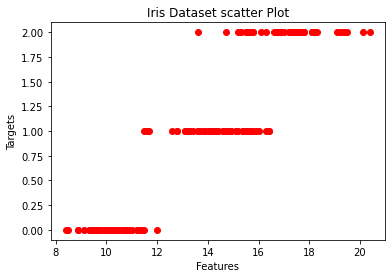

In [31]:
#Criando um gráfico com base nas somas do FeaturesAll

plt.scatter(featuresAll, targets, color='red', alpha = 1.0)
plt.rcParams['figure.figsize'] = [10,8]
plt.title('Iris Dataset scatter Plot')
plt.xlabel('Features')
plt.ylabel('Targets')

plt.show()

In [32]:
#Encontrando o relacionamento entre o comprimento e a largura 

sepal_len = []
sepal_width = []

for feature in features:
	sepal_len.append(feature[0]) #Comprimento da Sépala
	sepal_width.append(feature[1]) #Largura da Sépala

In [33]:


groups = ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica')
colors = ('blue', 'green', 'red')
data = ((sepal_len[:50], sepal_width[:50]), (sepal_len[50:100], sepal_width[50:100]),
       (sepal_len[100:150], sepal_width[100:150]))

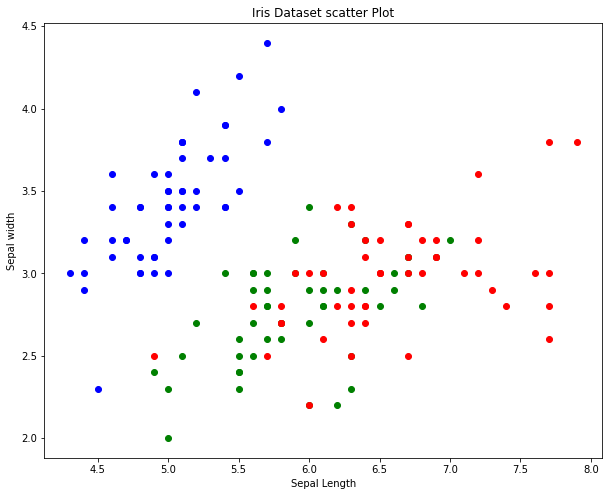

In [34]:
for item, color, group in zip(data, colors, groups):
	#item = (sepal_len[:50], sepal_width[:50]), (sepal_lean[50:100], sepal_width[50:100]),
	#(sepal_len[100:150], sepal_width[100:150])
	x0, y0 = item
	plt.scatter(x0, y0, color=color, alpha=1)
	plt.title('Iris Dataset scatter Plot')
    
plt.xlabel('Sepal Length')
plt.ylabel('Sepal width')
plt.show()

In [35]:
#Encontrando o relacionamento entre o comprimento e a largura 

petal_len = []
petal_width = []

for feature in features:
	petal_len.append(feature[2]) #Comprimento da Pétala
	petal_width.append(feature[3]) #Largura da Pétala


In [36]:
groups = ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica')
colors = ('blue', 'green', 'red')
data = ((petal_len[:50], petal_width[:50]), (petal_len[50:100], petal_width[50:100]),
       (petal_len[100:150], petal_width[100:150]))

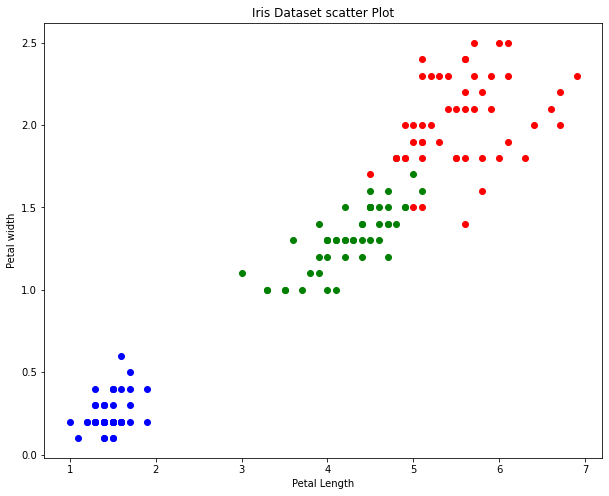

In [37]:
for item, color, group in zip(data, colors, group):
	#item = (sepal_len[:50], petal_width[:50]), (petal_lean[50:100], petal_width[50:100]),
	#(petal_len[100:150], petal_width[100:150])
	x0, y0 = item
	plt.scatter(x0, y0, color=color, alpha=1)
	plt.title('Iris Dataset scatter Plot')


plt.xlabel('Petal Length')
plt.ylabel('Petal width')
plt.show()